In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, mean_squared_error
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
data = pd.read_csv('/content/drive/MyDrive/machine_learning/smoking_driking_dataset_Ver01.csv')

In [ ]:
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


### Understanding the size of the dataset

In [269]:
data.shape

(991346, 22)

### Understanding the uniqueness of the data

In [ ]:
data.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

### Finding missing values

In [ ]:
data.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [ ]:
data = data.drop_duplicates(keep='first')
data[data.duplicated].shape

(0, 24)

### Description of dataset

In [ ]:
data.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,...,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000
mean,47.614529,162.240563,63.283884,81.233255,0.980833,0.978428,1.031495,1.030476,122.432360,76.052549,...,56.936984,113.037429,132.140030,14.229810,1.094221,0.860467,25.989424,25.755148,37.136152,1.608112
std,14.181346,9.282922,12.514101,11.850296,0.605954,0.604779,0.174652,0.171892,14.543083,9.889334,...,17.238578,35.842938,102.194762,1.584924,0.437719,0.480536,23.493668,26.308910,50.423811,0.818504
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [181]:
# Sample data loading
# data = pd.read_csv('your_dataset.csv')

# Combine sight_left and sight_right into sight
data['sight'] = (data['sight_left'] + data['sight_right']) / 2

# Combine hear_left and hear_right into hear
data['hear'] = (data['hear_left'] + data['hear_right']) / 2


# Check if tot_chole is approximately the sum of HDL_chole and LDL_chole
data['chol_difference'] = data['tot_chole'] - (data['HDL_chole'] + data['LDL_chole'])




# Drop the original columns
data = data.drop(columns=['sight_left', 'sight_right', 'hear_left', 'hear_right', 'chol_difference'])

# Check a sample of the modified data
print(data.head())


    sex  age  height  weight  waistline    SBP   DBP   BLDS  tot_chole  \
0  Male   35     170      75       90.0  120.0  80.0   99.0      193.0   
1  Male   30     180      80       89.0  130.0  82.0  106.0      228.0   
2  Male   40     165      75       91.0  120.0  70.0   98.0      136.0   
3  Male   50     175      80       91.0  145.0  87.0   95.0      201.0   
4  Male   50     165      60       80.0  138.0  82.0  101.0      199.0   

   HDL_chole  ...  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0       48.0  ...        17.1            1.0               1.0      21.0   
1       55.0  ...        15.8            1.0               0.9      20.0   
2       41.0  ...        15.8            1.0               0.9      47.0   
3       76.0  ...        17.6            1.0               1.1      29.0   
4       61.0  ...        13.8            1.0               0.8      19.0   

   SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  sight hear  
0      35.0       40.0             

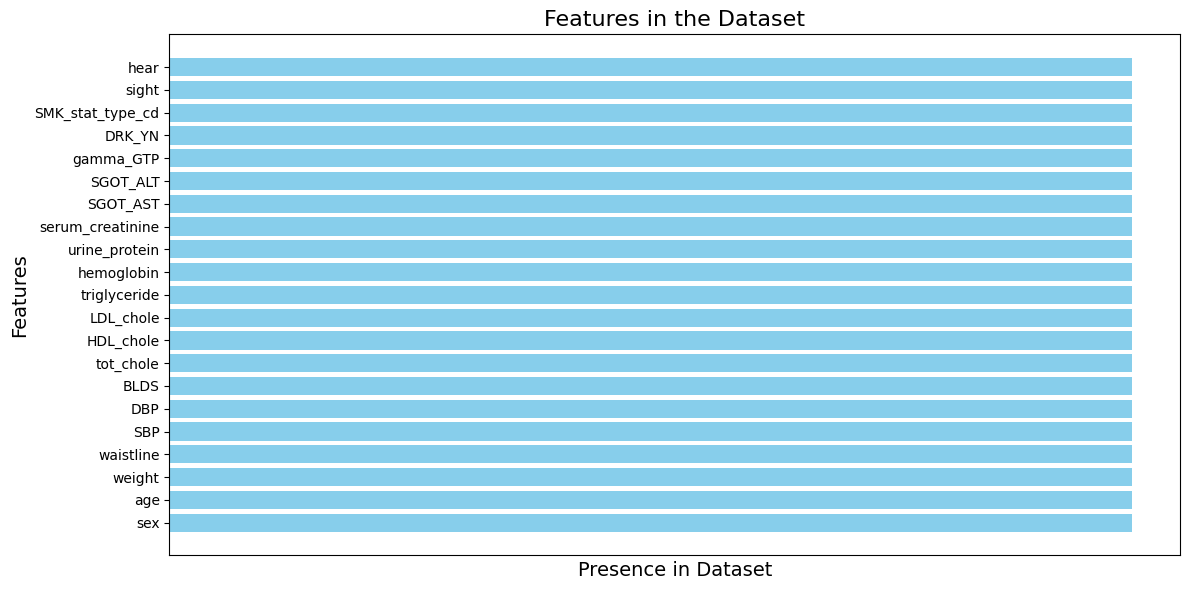

In [182]:
selected_features = [
    'sex', 'age', 'weight', 'waistline', 'SBP', 'DBP', 'BLDS', 'tot_chole',
    'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
    'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'DRK_YN', 'SMK_stat_type_cd', 'sight', 'hear'
]

# Create the plot
plt.figure(figsize=(12, 6))
plt.barh(selected_features, [1] * len(selected_features), color='skyblue')
plt.xlabel('Presence in Dataset', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Features in the Dataset', fontsize=16)
plt.xticks([])
plt.grid(axis='x')

# Save the plot
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/machine_learning/features_plot.png')
plt.show()

### Halving the dataset

In [ ]:
sample_fraction = 0.001
data = data.sample(frac=sample_fraction, random_state=42)

In [114]:
data.describe()

,age,height,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,sight,hear
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,122.432498,76.052627,100.424447,195.557020,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122,0.979632,1.030985
std,14.181339,9.282957,12.514241,11.850323,14.543148,9.889365,24.179960,38.660155,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507,0.489555,0.151893
min,20.000000,130.000000,25.000000,8.000000,67.000000,32.000000,25.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,0.750000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,120.000000,76.000000,96.000000,193.000000,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,0.950000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,1.200000,1.000000
max,85.000000,190.000000,140.000000,999.000000,273.000000,185.000000,852.000000,2344.000000,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000,9.900000,2.000000


# Preprocessing of the dataset

### Converting categorical values

In [183]:
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})
data['DRK_YN'] = data['DRK_YN'].map({'Y': 1, 'N': 0})

X = data.drop(['DRK_YN'], axis=1)
y = data['DRK_YN']

display(data.head())

,sex,age,height,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,sight,hear
0,1,35,170,75,90.0,120.0,80.0,99.0,193.0,48.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1,1.00,1.0
1,1,30,180,80,89.0,130.0,82.0,106.0,228.0,55.0,...,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0,1.05,1.0
2,1,40,165,75,91.0,120.0,70.0,98.0,136.0,41.0,...,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0,1.35,1.0
3,1,50,175,80,91.0,145.0,87.0,95.0,201.0,76.0,...,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0,1.35,1.0
4,1,50,165,60,80.0,138.0,82.0,101.0,199.0,61.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0,1.10,1.0


In [78]:
# Verification
# Check if the specified columns are dropped from X
print("Columns in X after dropping: ", X.columns.tolist())
print("First few rows of X:\n", X.head())

# Check if y contains the correct target variable
print("First few rows of y:\n", y.head())

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Columns in X after dropping:  ['sex', 'age', 'height', 'weight', 'waistline', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'sight', 'hear']
First few rows of X:
    sex  age  height  weight  waistline    SBP   DBP   BLDS  tot_chole  \
0    1   35     170      75       90.0  120.0  80.0   99.0      193.0   
1    1   30     180      80       89.0  130.0  82.0  106.0      228.0   
2    1   40     165      75       91.0  120.0  70.0   98.0      136.0   
3    1   50     175      80       91.0  145.0  87.0   95.0      201.0   
4    1   50     165      60       80.0  138.0  82.0  101.0      199.0   

   HDL_chole  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0       48.0      126.0          92.0        17.1            1.0   
1       55.0      148.0         121.0        15.8            1.0   
2       41.0       74.0         104.0        15.8            1.0   
3      

In [79]:
for feature in data:
    print(feature)

sex
age
height
weight
waistline
SBP
DBP
BLDS
tot_chole
HDL_chole
LDL_chole
triglyceride
hemoglobin
urine_protein
serum_creatinine
SGOT_AST
SGOT_ALT
gamma_GTP
sight
hear
SMK_DRK_combined


In [146]:
data.to_csv('/content/drive/MyDrive/machine_learning/preprocessed_dataset.csv', index=False)

In [2]:
data = pd.read_csv('/content/drive/MyDrive/machine_learning/preprocessed_dataset.csv')

In [3]:
# Specify the number of rows you want to sample
num_rows_to_sample = 200000

# Randomly sample the specified number of rows
data = data.sample(n=num_rows_to_sample, random_state=42)

In [172]:
data.head()

,sex,age,height,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,sight,hear
676014,0,45,160,60,85.0,113.0,77.0,84.0,195.0,82.0,...,13.3,1.0,0.8,16.0,13.0,14.0,1.0,0,1.10,1.0
958905,1,30,175,70,87.0,135.0,78.0,90.0,223.0,50.0,...,15.9,2.0,1.2,24.0,28.0,16.0,1.0,0,0.90,1.0
472540,1,35,180,85,93.0,129.0,86.0,102.0,206.0,46.0,...,16.6,1.0,1.0,34.0,61.0,25.0,2.0,0,1.35,1.0
244194,1,35,175,80,89.0,119.0,76.0,77.0,202.0,62.0,...,15.2,1.0,0.9,18.0,17.0,17.0,1.0,1,1.50,1.0
88447,0,40,160,70,97.0,124.0,67.0,78.0,166.0,58.0,...,12.8,1.0,0.5,15.0,17.0,14.0,1.0,0,1.25,1.0


In [173]:
data.describe()

,sex,age,height,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,sight,hear
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,0.550000,47.770000,162.770000,63.530000,81.452600,123.194000,76.298000,101.110000,196.096000,57.12400,...,14.281800,1.074000,0.844400,26.524000,27.510000,41.094000,1.622000,0.488000,1.000100,1.03300
std,0.497992,14.463592,9.821916,13.283147,10.203175,14.779487,9.943991,26.058088,36.956222,14.83566,...,1.717413,0.347513,0.205507,14.099895,23.163917,69.477041,0.834571,0.500357,0.493591,0.14301
min,0.000000,20.000000,135.000000,35.000000,56.000000,90.000000,52.000000,68.000000,93.000000,19.00000,...,4.600000,1.000000,0.100000,11.000000,6.000000,5.000000,1.000000,0.000000,0.100000,1.00000
25%,0.000000,40.000000,155.000000,55.000000,75.000000,112.000000,70.000000,89.000000,170.000000,47.00000,...,13.200000,1.000000,0.700000,19.000000,15.000000,15.000000,1.000000,0.000000,0.787500,1.00000
50%,1.000000,50.000000,165.000000,60.000000,81.000000,122.000000,76.000000,96.000000,194.000000,55.00000,...,14.300000,1.000000,0.800000,23.000000,21.000000,24.000000,1.000000,0.000000,0.950000,1.00000
75%,1.000000,60.000000,170.000000,70.000000,89.000000,132.000000,83.000000,105.000000,219.250000,67.00000,...,15.400000,1.000000,1.000000,29.000000,31.000000,41.000000,2.000000,1.000000,1.200000,1.00000
max,1.000000,85.000000,185.000000,120.000000,116.000000,170.000000,115.000000,324.000000,385.000000,138.00000,...,19.800000,4.000000,2.400000,138.000000,214.000000,999.000000,3.000000,1.000000,5.300000,2.00000


# Feature engineering

In [4]:



X = data.drop(['DRK_YN', 'SBP', 'BLDS', 'tot_chole', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT'], axis=1)
y = data['DRK_YN']




# Split the data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training + validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [278]:
X = data.drop(['DRK_YN'], axis=1)
y = data['DRK_YN']
# Split the data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training + validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [8]:
print("Remaining features in the dataset:")
print(X.columns)

Remaining features in the dataset:
Index(['sex', 'age', 'height', 'weight', 'waistline', 'DBP', 'HDL_chole',
       'LDL_chole', 'triglyceride', 'hemoglobin', 'gamma_GTP',
       'SMK_stat_type_cd', 'sight', 'hear'],
      dtype='object')


In [204]:
X_train

,sex,age,height,weight,waistline,DBP,BLDS,triglyceride,hemoglobin,gamma_GTP,SMK_stat_type_cd,sight,hear
794836,1,35,160,75,89.0,62.0,93.0,83.0,15.0,25.0,3.0,1.10,1.0
628940,1,40,165,80,91.0,64.0,109.0,175.0,15.9,95.0,1.0,1.50,1.0
961573,1,40,160,60,80.1,65.0,109.0,88.0,14.6,96.0,3.0,0.80,1.0
389209,0,30,165,60,74.0,72.0,90.0,174.0,14.2,19.0,1.0,1.35,1.0
593804,1,70,155,60,96.0,70.0,96.0,72.0,11.4,33.0,1.0,0.80,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376915,1,70,160,45,66.0,70.0,81.0,72.0,13.2,24.0,3.0,0.50,1.0
7540,0,50,155,60,87.0,72.0,101.0,99.0,13.8,20.0,1.0,1.00,1.0
967508,1,60,160,55,81.0,82.0,128.0,99.0,12.1,25.0,2.0,0.45,1.0
822458,1,45,170,70,90.0,63.0,107.0,482.0,16.0,49.0,2.0,1.35,1.0


In [5]:
scaler = StandardScaler()

# Compute the scaling parameters from the training data and scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the validation and test data using the parameters computed from the training data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Converting the scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [ ]:
data.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

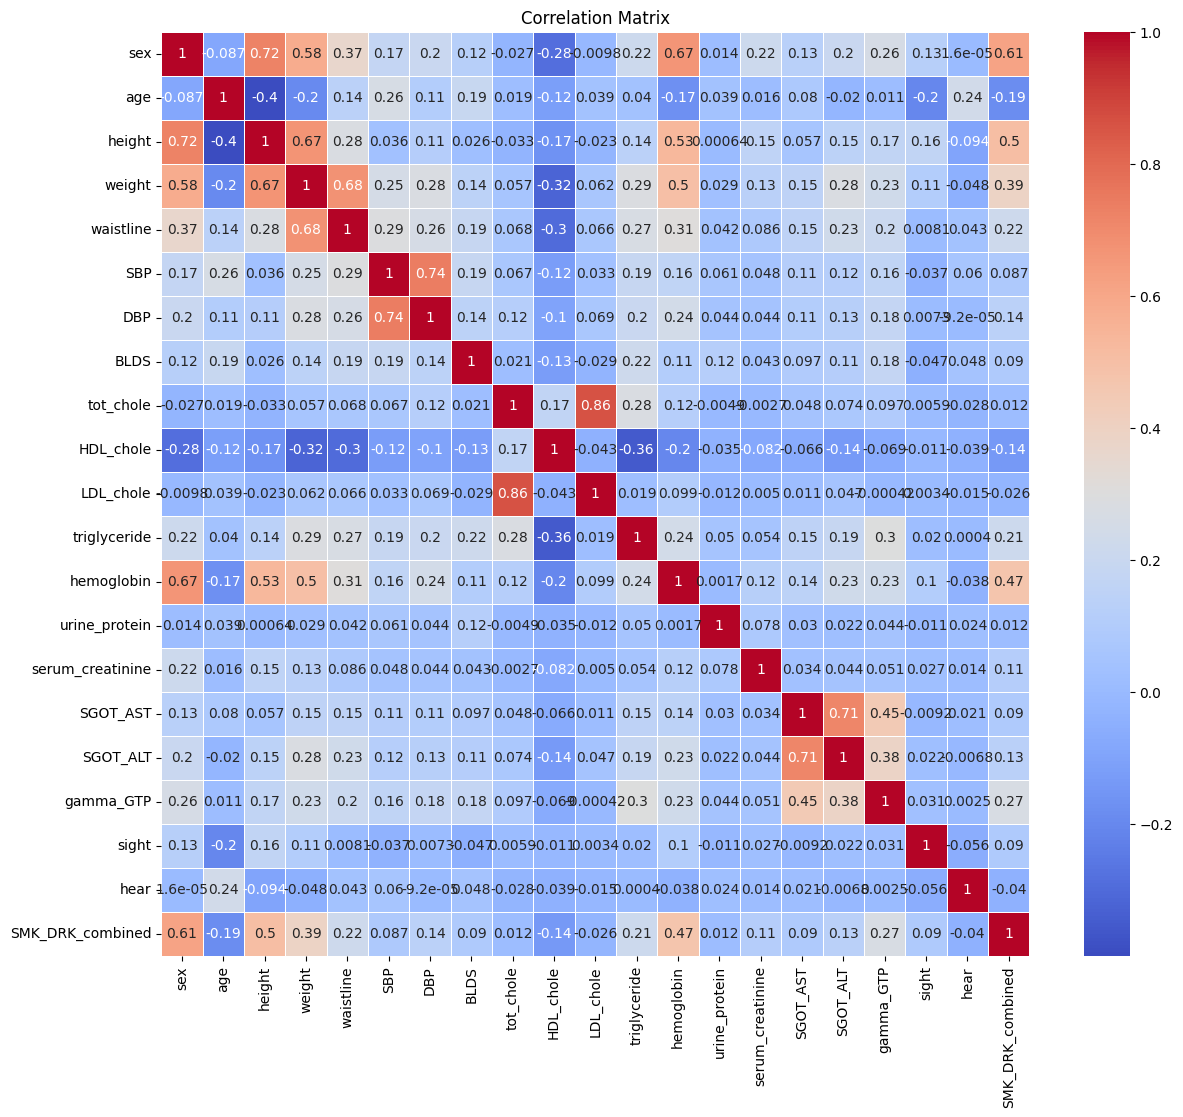

In [103]:
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [84]:
def plotting_patterns(column, result_column='DRK_YN'):
    grouped = data.groupby([column, result_column]).size().reset_index(name='Count')

    total_counts = data[column].value_counts().reset_index()
    total_counts.columns = [column, 'Total']

    grouped = grouped.merge(total_counts, on=column)

    grouped['Percentage'] = (grouped['Count'] / grouped['Total']) * 100

    grouped = grouped.sort_values(by='Percentage', ascending=False)

    plt.figure(figsize=(14, 6))
    sns.barplot(data=grouped, x=result_column, y='Percentage', hue=column)
    plt.title(f'Percentage of {result_column} Types by {column}')
    plt.ylabel('Percentage')
    plt.xlabel(f'{result_column} Type')
    plt.legend(title=column)
    plt.savefig(f"/content/drive/MyDrive/machine_learning/diagrams/{column}_{result_column}_combined_drink_smoke.jpg", format="jpg")
    plt.show()

In [194]:
print(X.columns)

Index(['sex', 'age', 'height', 'weight', 'waistline', 'DBP', 'BLDS',
       'triglyceride', 'hemoglobin', 'gamma_GTP', 'SMK_stat_type_cd', 'sight',
       'hear'],
      dtype='object')


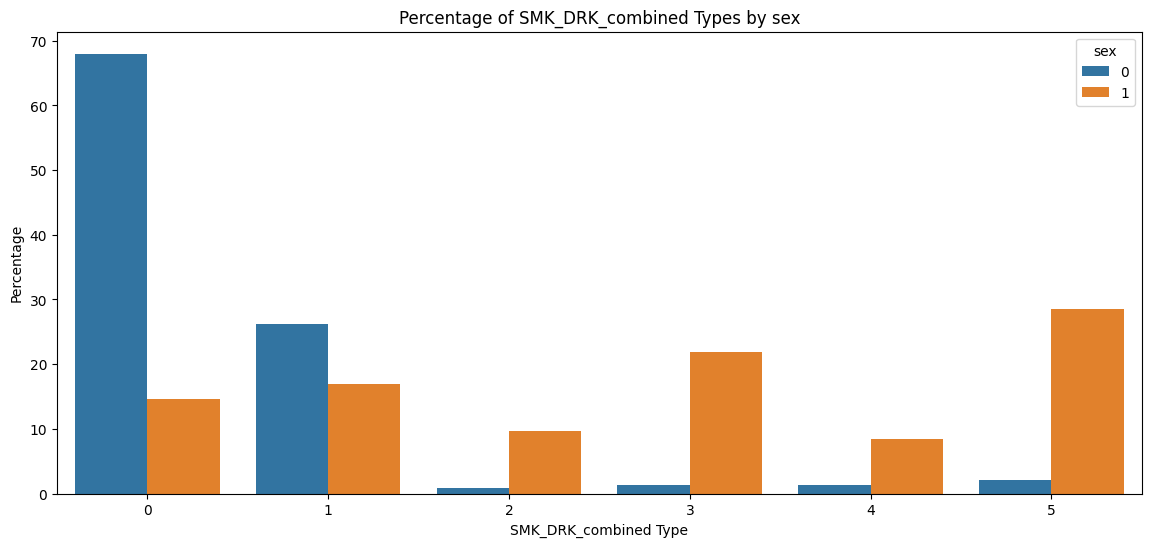

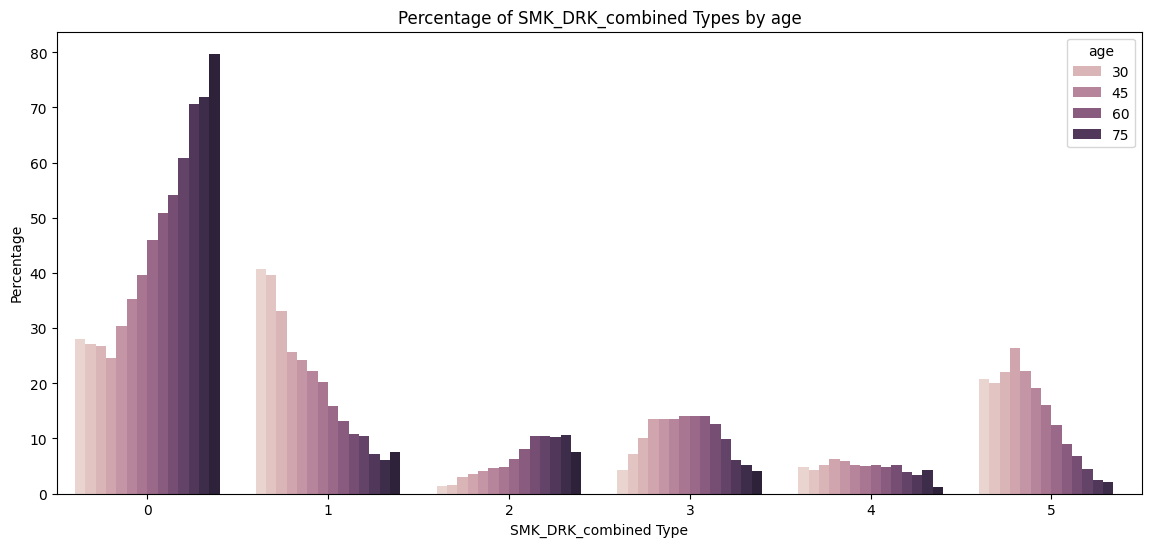

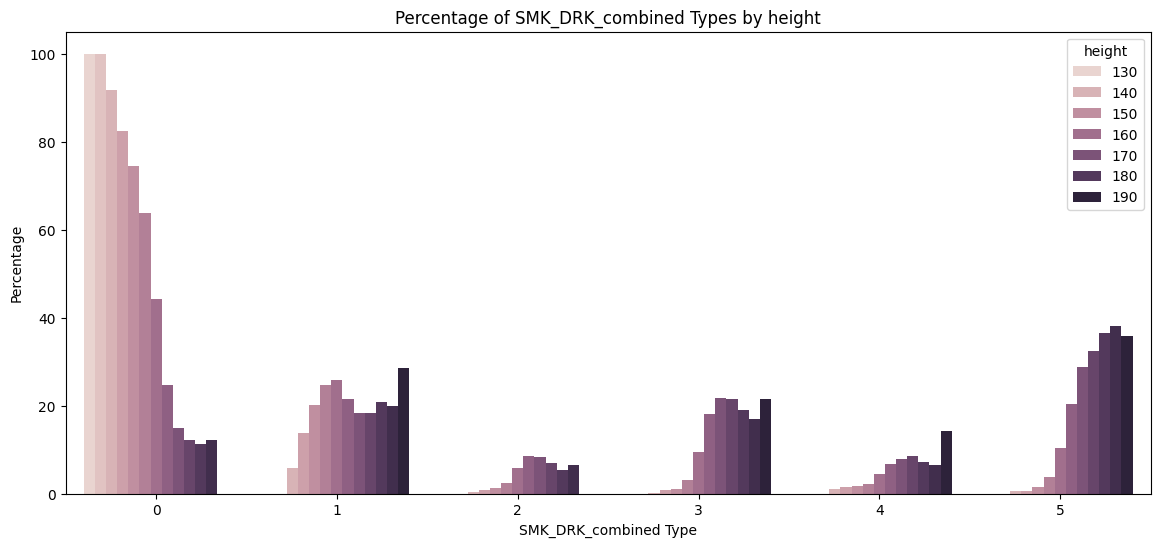

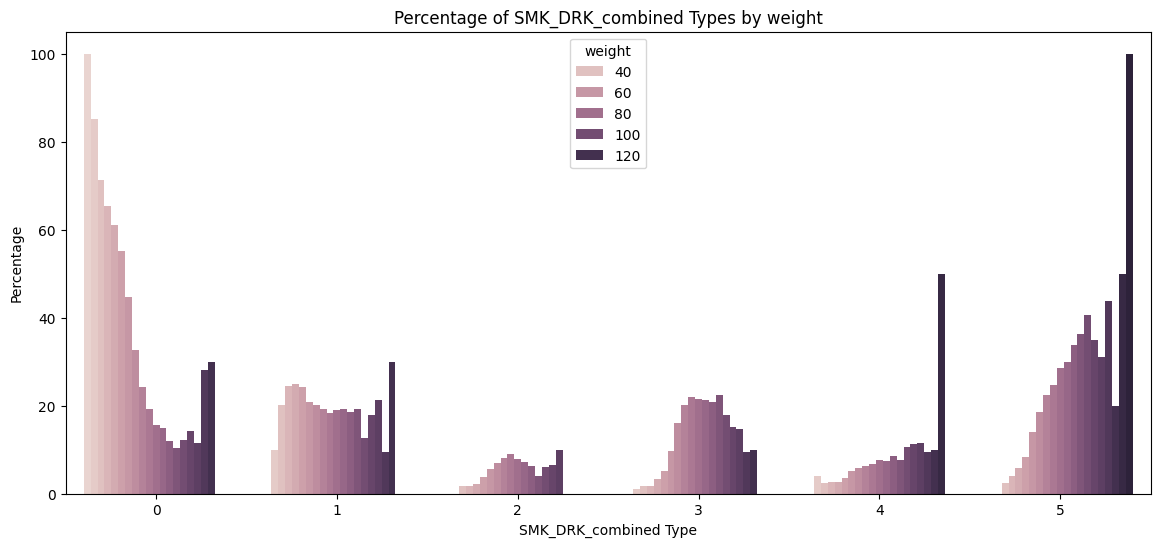

<ipython-input-84-2ae1c1b4e0d6>:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"/content/drive/MyDrive/machine_learning/diagrams/{column}_{result_column}_combined_drink_smoke.jpg", format="jpg")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


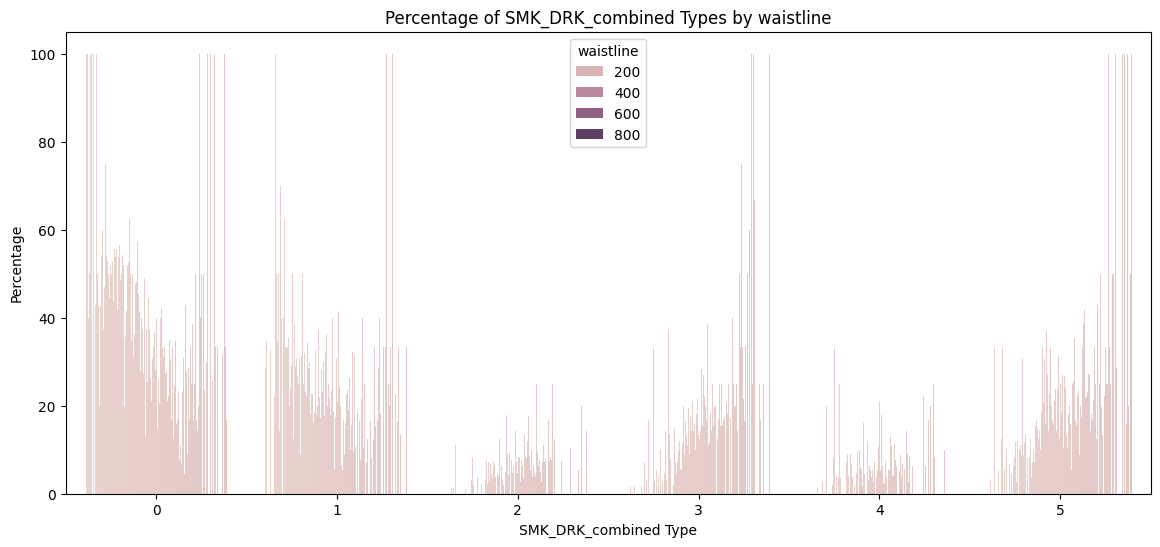

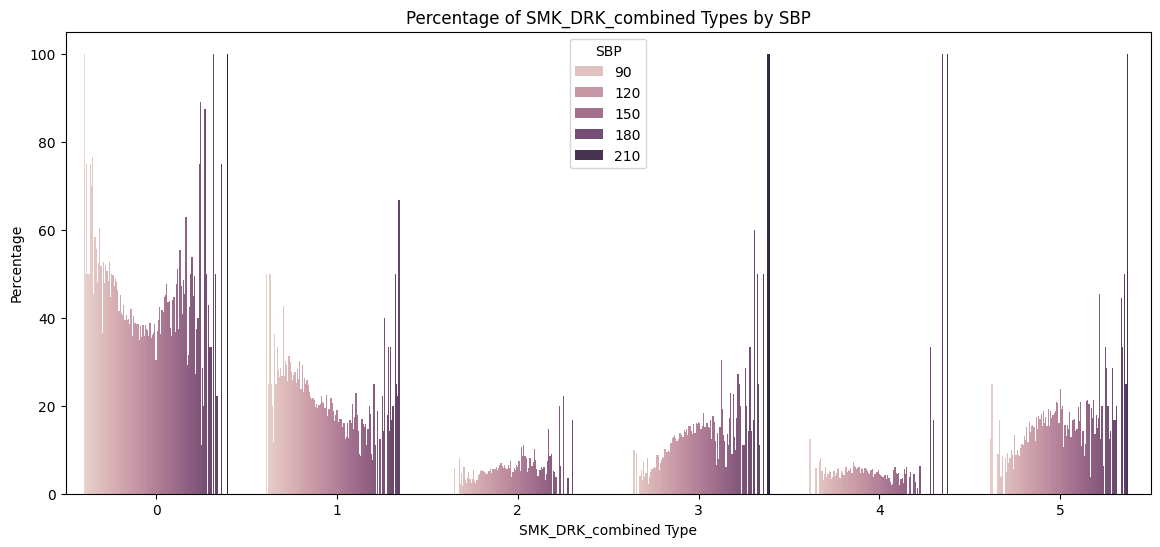

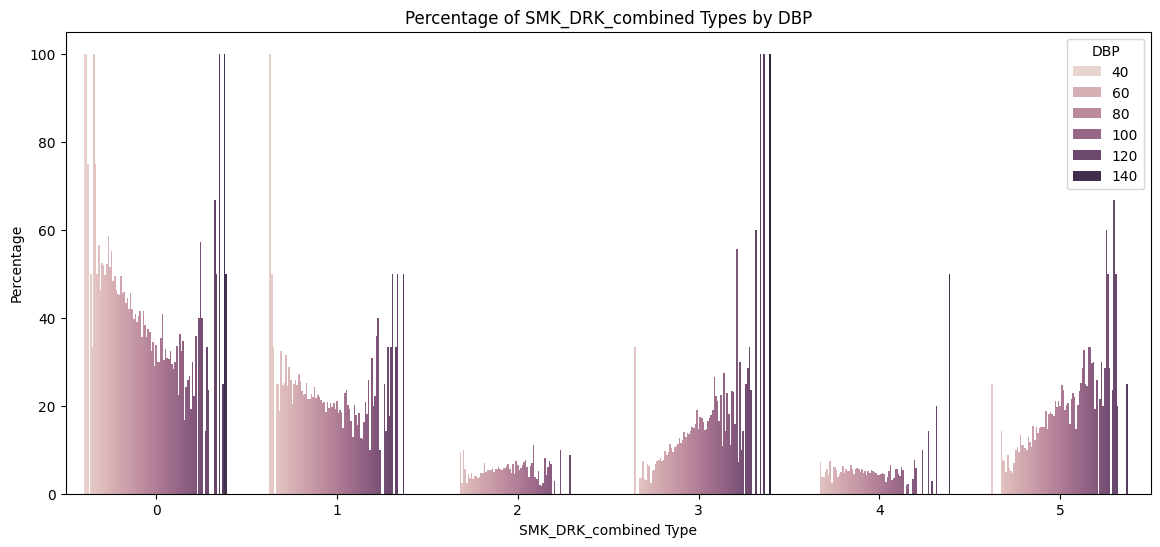

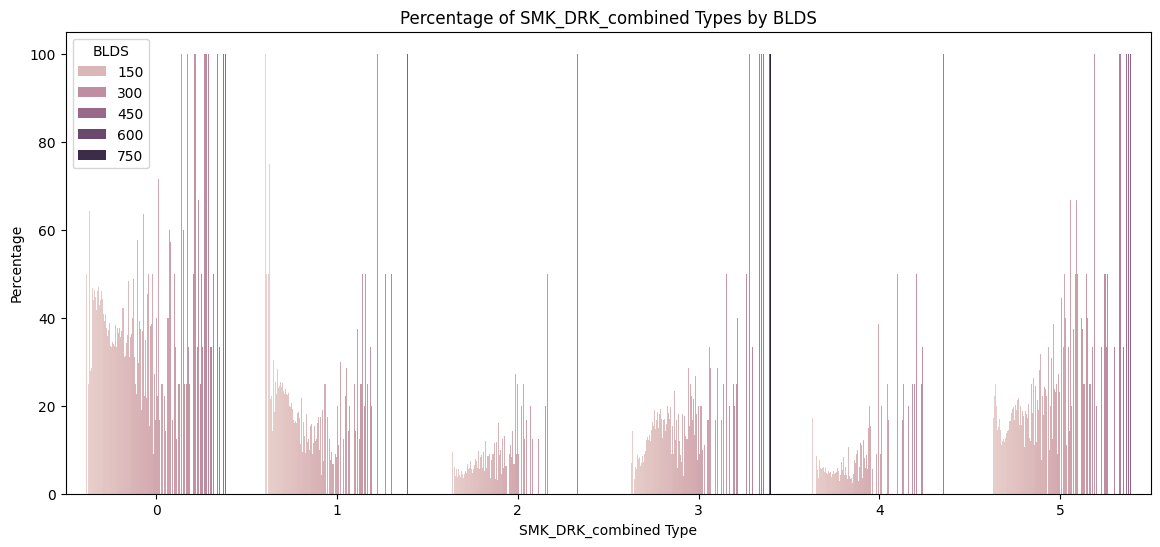

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


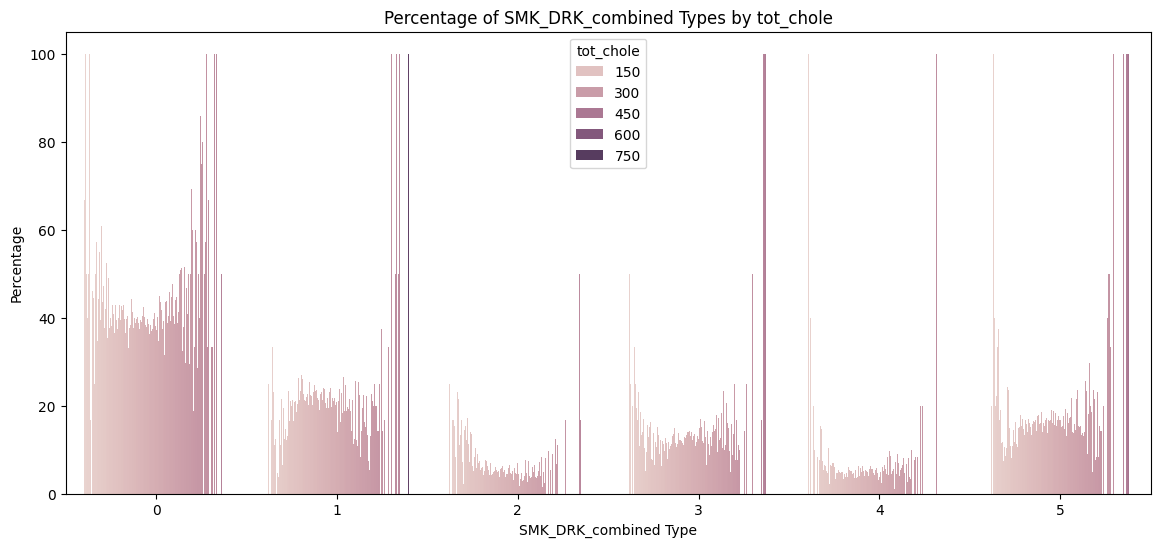

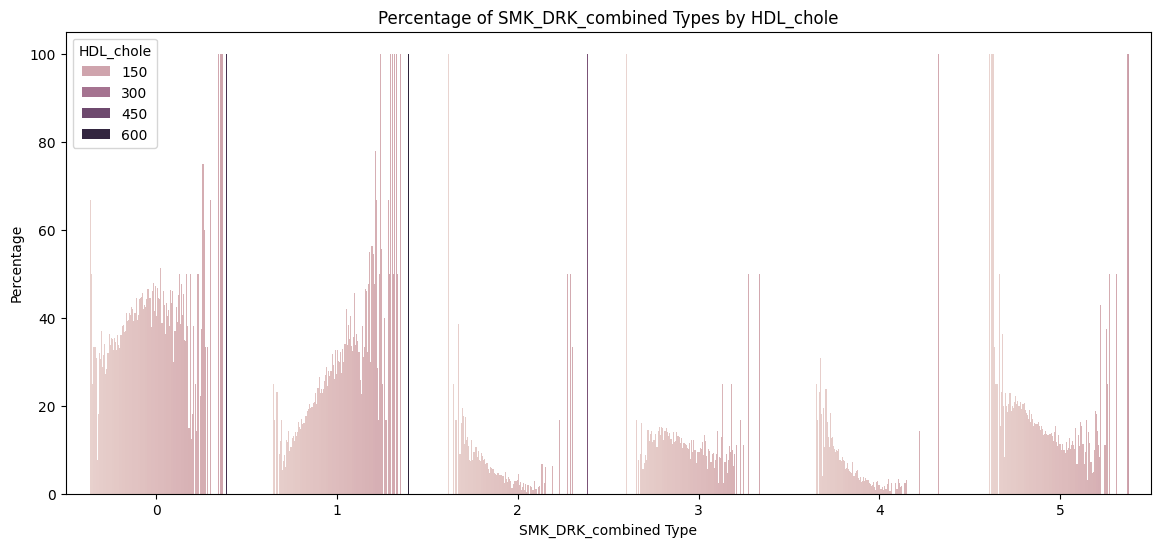

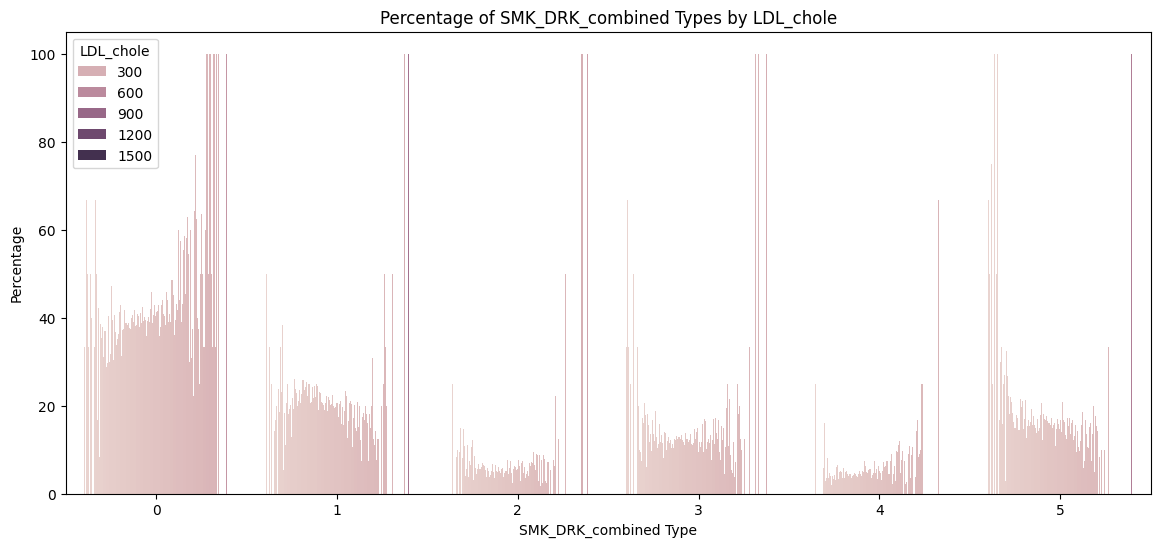

<ipython-input-84-2ae1c1b4e0d6>:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"/content/drive/MyDrive/machine_learning/diagrams/{column}_{result_column}_combined_drink_smoke.jpg", format="jpg")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


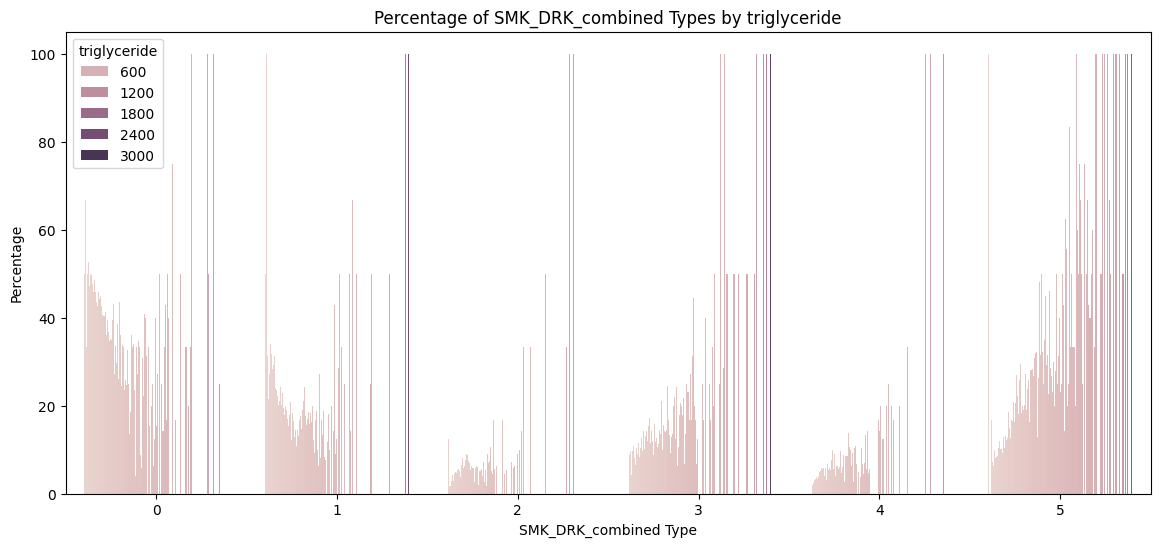

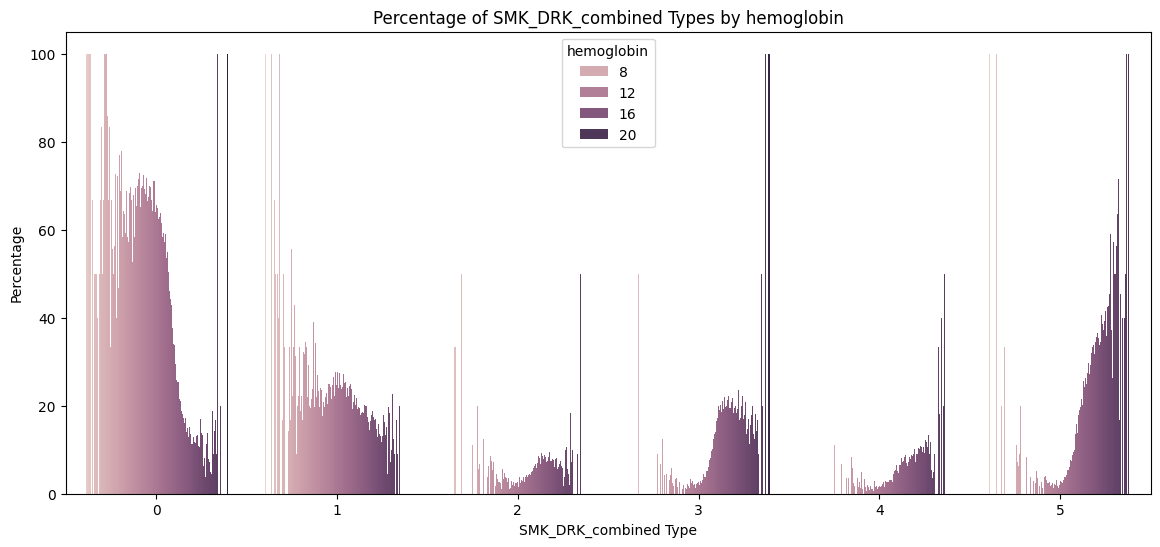

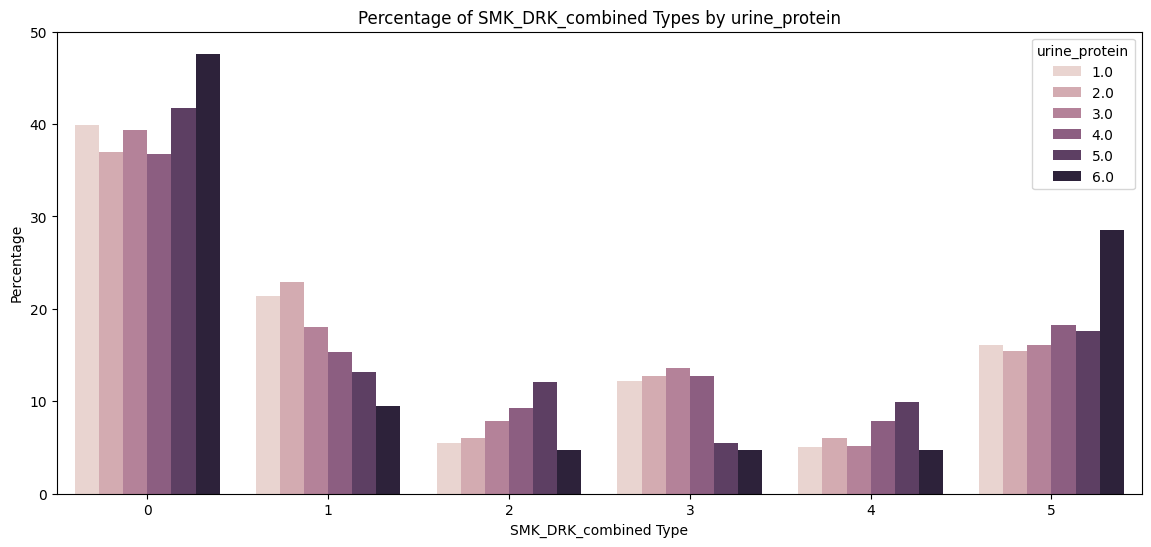

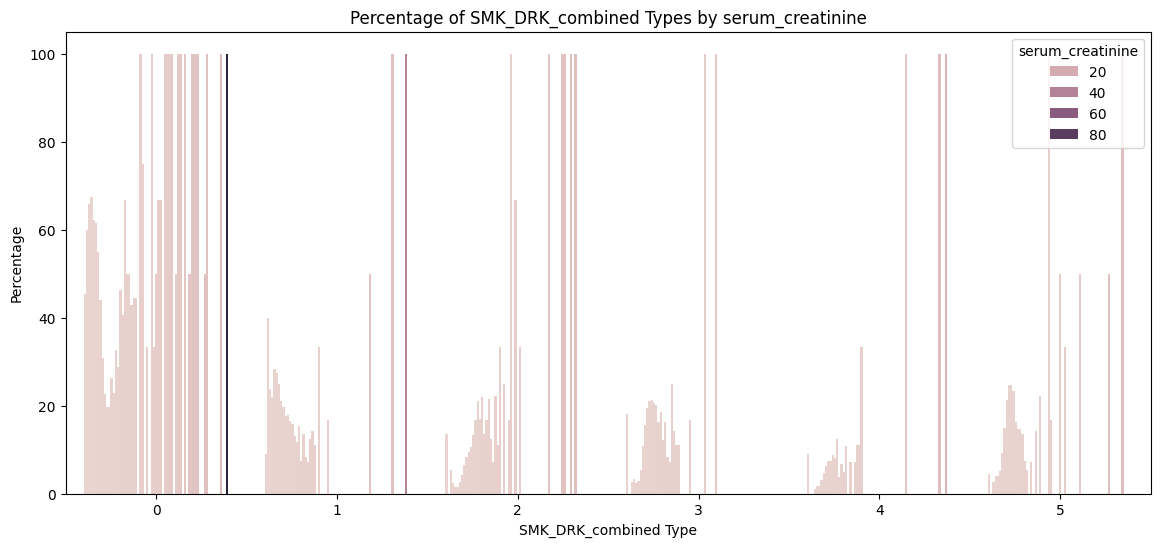

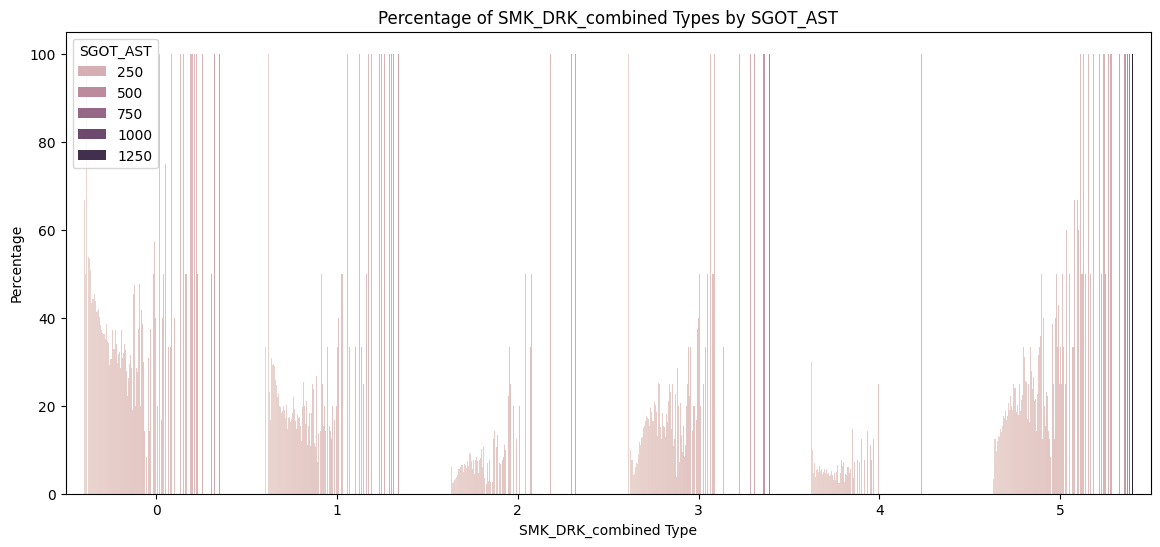

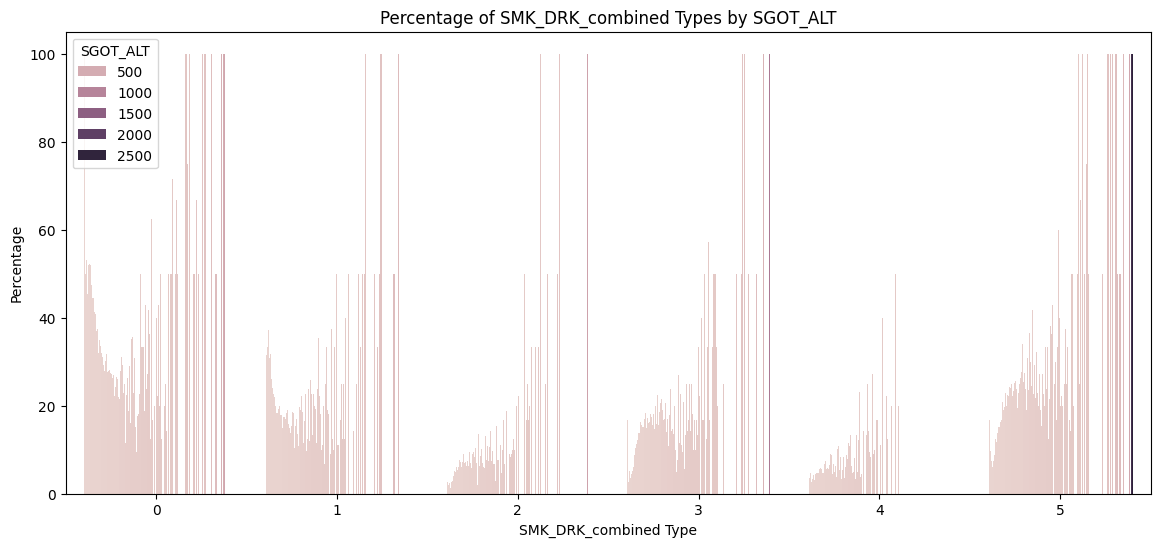

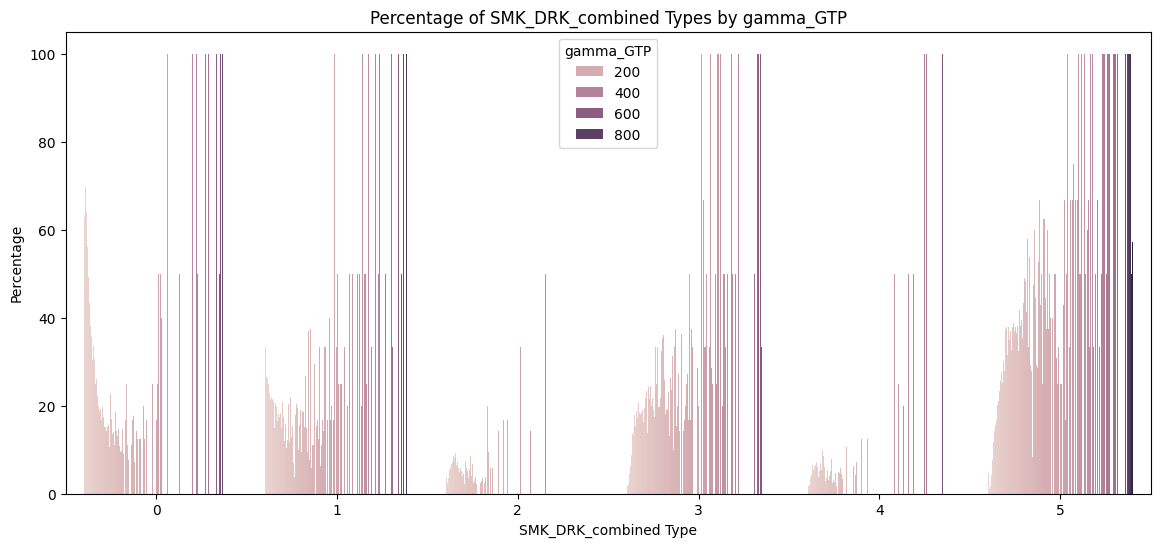

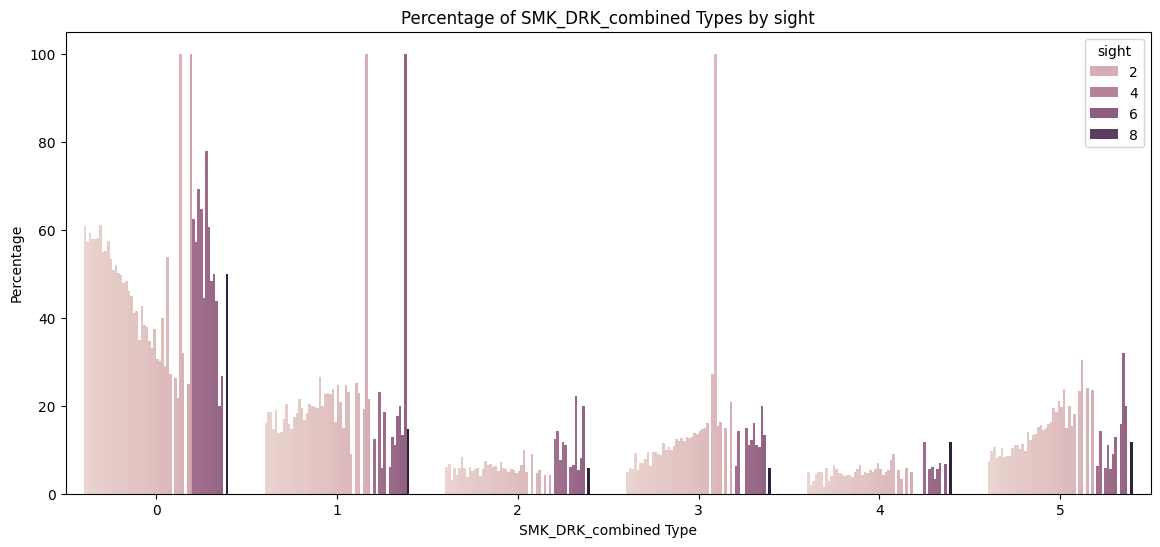

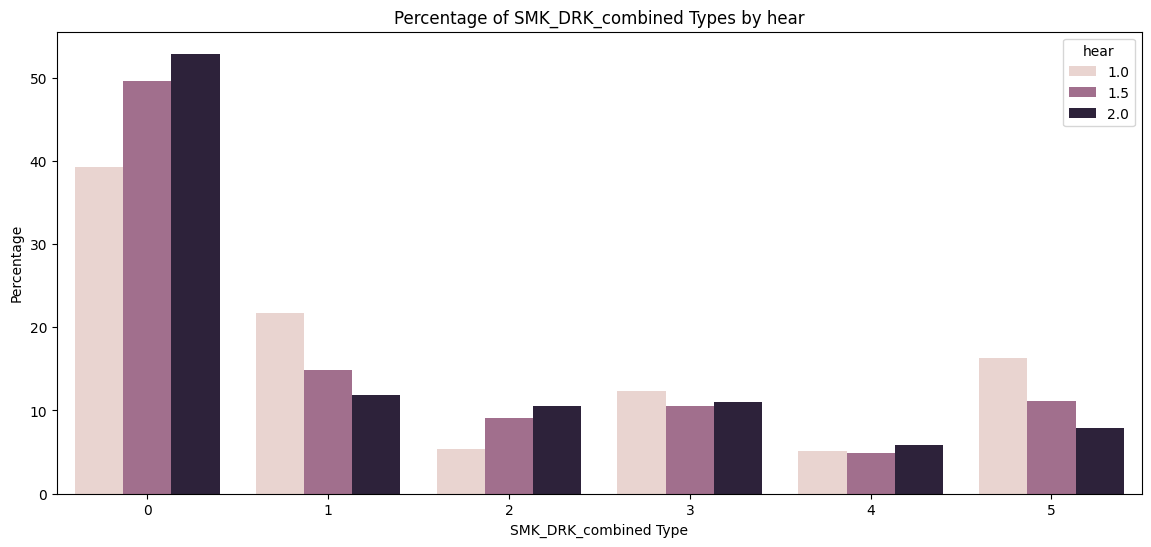

In [85]:
columns = X.columns
for i in columns:
  plotting_patterns(i, 'SMK_DRK_combined')

### 60 % for train, 20% for validation, 20% for test


In [7]:
print(len(X_train_scaled_df), len(X_test), len(X_val))

120000 40000 40000


In [ ]:
y_train

205296    0
576046    0
321531    0
485500    1
844127    1
         ..
572770    1
952223    0
470216    1
248876    1
427276    1
Name: DRK_YN, Length: 120000, dtype: int64

In [65]:
num_target_value_1 = (y_train == 1).sum()
num_target_value_0 = (y_train == 0).sum()

# Print the result
print(f"Number of samples in y_train with the target value 1: {num_target_value_1}")
print(f"Number of samples in y_train with the target value 0: {num_target_value_0}")

Number of samples in y_train with the target value 1: 44692
Number of samples in y_train with the target value 0: 45308


### Train dataset does not need oversampling

In [ ]:
!pip install mlxtend

### Forward Feature Selection

In [9]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.svm import LinearSVC

In [ ]:
try:
    selected_features = joblib.load('/content/drive/MyDrive/machine_learning/selected_features.pkl')
    print("Loaded selected features from file.")
except FileNotFoundError:
    print("Performing backward feature elimination.")
    classifier = LinearSVC(max_iter=5000, verbose=1)  # Adjust max_iter as needed
    bfs = SequentialFeatureSelector(classifier, k_features='best', forward=False, n_jobs=-1)
    bfs.fit(X_train_scaled_df, y_train)
    feature_indices = bfs.k_feature_idx_
    selected_features = X_train_scaled_df.columns[list(feature_indices)]
    joblib.dump(selected_features, '/content/drive/MyDrive/machine_learning/forward_features.pkl')
    print("Selected features saved to file.")

print("Selected Features:", selected_features)

Performing backward feature elimination.
[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

In [ ]:
import joblib

# Assuming 'selected_features' contains the list of selected feature names
selected_features = list(X_train_scaled_df.columns[list(ffs.k_feature_idx_)])

# Save the selected features to a file
joblib.dump(selected_features, '/content/drive/MyDrive/machine_learning/forward_features.pkl')

In [238]:
from tqdm import tqdm

### Backward Feature Elimination

In [ ]:
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import joblib
import numpy as np

# Define the classifier
classifier = KNeighborsClassifier()

# Define the pipeline
pipeline = Pipeline([
    ('feature_selection', SFS(classifier, forward=False, scoring='accuracy', cv=5, n_jobs=-1)),
    ('classification', classifier)
])

# Define the parameter grid for cross-validation
param_grid = {
    'feature_selection__k_features': [5, 10],
    'classification__n_neighbors': [5, 10, 15]
}

# Use a smaller subset of the data for initial tuning
X_small, _, y_small, _ = train_test_split(X_train_scaled_df, y_train, train_size=0.1, random_state=42)

best_score = 0
best_params = None
best_pipeline = None

# Iterate over all combinations in param_grid
for k_features in param_grid['feature_selection__k_features']:
    for n_neighbors in param_grid['classification__n_neighbors']:
        # Update the pipeline parameters
        pipeline.set_params(
            feature_selection__k_features=k_features,
            classification__n_neighbors=n_neighbors
        )

        # Perform cross-validation
        cv_scores = cross_val_score(pipeline, X_small, y_small, cv=3, n_jobs=-1)
        mean_score = np.mean(cv_scores)

        if mean_score > best_score:
            best_score = mean_score
            best_params = {
                'feature_selection__k_features': k_features,
                'classification__n_neighbors': n_neighbors
            }
            best_pipeline = pipeline

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

# Fit the best pipeline on the entire training set
best_pipeline.fit(X_train_scaled_df, y_train)

# Correctly retrieve the selected feature names
selected_feature_indices = best_pipeline.named_steps['feature_selection'].k_feature_idx_
selected_features = X_train_scaled_df.columns[list(selected_feature_indices)]

# Transform the training, validation, and test sets with the selected features
X_train_selected = X_train_scaled_df[selected_features]
X_val_selected = X_val_scaled_df[selected_features]
X_test_selected = X_test_scaled_df[selected_features]

# Train the final model using the best parameters
final_classifier = KNeighborsClassifier(n_neighbors=best_params['classification__n_neighbors'])
final_classifier.fit(X_train_selected, y_train)

# Evaluate on the validation set
y_pred_val = final_classifier.predict(X_val_selected)
print("Validation Set Classification Report:\n", classification_report(y_val, y_pred_val))
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {val_accuracy}')

# Evaluate on the test set
y_pred_test = final_classifier.predict(X_test_selected)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test))
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy}')

# Save the scaler, final model, and selected features
joblib.dump(scaler, '/content/drive/MyDrive/machine_learning/scaler_knn_selection.pkl')
joblib.dump(final_classifier, '/content/drive/MyDrive/machine_learning/knn_model_selection.pkl')
joblib.dump(selected_features, '/content/drive/MyDrive/machine_learning/selected_features_knn_selection.pkl')

# Print information about the data used
print(f"Number of training samples: {len(X_train_scaled_df)}")
print(f"Number of validation samples: {len(X_val_scaled_df)}")
print(f"Number of test samples: {len(X_test_scaled_df)}")
print("Features used in the model:", selected_features.tolist())

# XGB MODEL

In [274]:
from xgboost import XGBClassifier

# Define a smaller parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the classifier
classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Use a smaller subset of the data for initial tuning
X_small, _, y_small, _ = train_test_split(X_train_scaled, y_train, train_size=0.1, random_state=42)
grid_search.fit(X_small, y_small)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the final model using the best parameters with early stopping
final_classifier = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
final_classifier.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val_scaled, y_val)],
    early_stopping_rounds=10,
    verbose=False
)

# Evaluate on the validation set
y_pred_val = final_classifier.predict(X_val_scaled)
print("Validation Set Classification Report:\n", classification_report(y_val, y_pred_val))
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {val_accuracy}')

# Evaluate on the test set
y_pred_test = final_classifier.predict(X_test_scaled)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test))
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy}')

# Save the scaler, final model, and selected features
joblib.dump(scaler, '/content/drive/MyDrive/machine_learning/scaler_xgb.pkl')
joblib.dump(final_classifier, '/content/drive/MyDrive/machine_learning/xgboost_model.pkl')

# Print information about the data used
print(f"Number of training samples: {len(X_train_scaled)}")
print(f"Number of validation samples: {len(X_val_scaled)}")
print(f"Number of test samples: {len(X_test_scaled)}")

# Convert the scaled arrays back to DataFrames if not already done
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the features used in the model
print("Features used in the model:", X_train_scaled_df.columns.tolist())

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73     98685
           1       0.73      0.75      0.74     99584

    accuracy                           0.73    198269
   macro avg       0.73      0.73      0.73    198269
weighted avg       0.73      0.73      0.73    198269

Validation Accuracy: 0.7329032778699646
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73     99595
           1       0.72      0.75      0.74     98675

    accuracy                           0.73    198270
   macro avg       0.73      0.73      0.73    198270
weighted avg       0.73      0.73      0.73    198270

Test Accuracy: 0.7322186916830584
Number of training samples: 594807
Number of validation samples: 198269
Number of test samples: 198270
Features used in the model: ['sex', 'age', 'height', 'weight', 'waistline', 'DBP', 'HDL_chole', '

# KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import joblib
import pandas as pd

# Define a smaller parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the classifier
classifier = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Use a smaller subset of the data for initial tuning
X_small, _, y_small, _ = train_test_split(X_train_scaled, y_train, train_size=0.1, random_state=42)
grid_search.fit(X_small, y_small)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the final model using the best parameters
final_classifier = KNeighborsClassifier(**best_params)
final_classifier.fit(X_train_scaled, y_train)

# Evaluate on the validation set
y_pred_val = final_classifier.predict(X_val_scaled)
print("Validation Set Classification Report:\n", classification_report(y_val, y_pred_val))
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {val_accuracy}')

# Evaluate on the test set
y_pred_test = final_classifier.predict(X_test_scaled)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test))
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy}')

# Save the scaler and final model
joblib.dump(scaler, '/content/drive/MyDrive/machine_learning/scaler_knn.pkl')
joblib.dump(final_classifier, '/content/drive/MyDrive/machine_learning/knn_model.pkl')

# Print information about the data used
print(f"Number of training samples: {len(X_train_scaled)}")
print(f"Number of validation samples: {len(X_val_scaled)}")
print(f"Number of test samples: {len(X_test_scaled)}")

# Convert the scaled arrays back to DataFrames if not already done
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the features used in the model
print("Features used in the model:", X_train_scaled_df.columns.tolist())

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.69     20119
           1       0.69      0.70      0.70     19881

    accuracy                           0.70     40000
   macro avg       0.70      0.70      0.70     40000
weighted avg       0.70      0.70      0.70     40000

Validation Accuracy: 0.695675
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.70     19921
           1       0.70      0.71      0.70     20079

    accuracy                           0.70     40000
   macro avg       0.70      0.70      0.70     40000
weighted avg       0.70      0.70      0.70     40000

Test Accuracy: 0.69885
Number of training samples: 120000
Number of validation samples: 40000
N

# RANDOM FOREST MODEL

In [275]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import joblib
import pandas as pd

# Define a smaller parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Use a smaller subset of the data for initial tuning
X_small, _, y_small, _ = train_test_split(X_train_scaled, y_train, train_size=0.1, random_state=42)
grid_search.fit(X_small, y_small)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the final model using the best parameters
final_classifier = RandomForestClassifier(**best_params, random_state=42)
final_classifier.fit(X_train_scaled, y_train)

# Evaluate on the validation set
y_pred_val = final_classifier.predict(X_val_scaled)
print("Validation Set Classification Report:\n", classification_report(y_val, y_pred_val))
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {val_accuracy}')

# Evaluate on the test set
y_pred_test = final_classifier.predict(X_test_scaled)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test))
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy}')

# Save the scaler, final model, and selected features
joblib.dump(scaler, '/content/drive/MyDrive/machine_learning/scaler_rf.pkl')
joblib.dump(final_classifier, '/content/drive/MyDrive/machine_learning/random_forest_model.pkl')

# Print information about the data used
print(f"Number of training samples: {len(X_train_scaled)}")
print(f"Number of validation samples: {len(X_val_scaled)}")
print(f"Number of test samples: {len(X_test_scaled)}")

# Convert the scaled arrays back to DataFrames if not already done
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the features used in the model
print("Features used in the model:", X_train_scaled_df.columns.tolist())

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72     98685
           1       0.72      0.74      0.73     99584

    accuracy                           0.73    198269
   macro avg       0.73      0.73      0.73    198269
weighted avg       0.73      0.73      0.73    198269

Validation Accuracy: 0.7285152999208147
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72     99595
           1       0.72      0.74      0.73     98675

    accuracy                           0.73    198270
   macro avg       0.73      0.73      0.73    198270
weighted avg       0.73      0.73      0.73    198270

Test Accuracy: 0.7276743834165532
Number of 

# SVM

In [276]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import joblib
import pandas as pd

# Define a smaller parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize the classifier
classifier = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Use a smaller subset of the data for initial tuning
X_small, _, y_small, _ = train_test_split(X_train_scaled, y_train, train_size=0.1, random_state=42)
grid_search.fit(X_small, y_small)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the final model using the best parameters
final_classifier = SVC(**best_params)
final_classifier.fit(X_train_scaled, y_train)

# Evaluate on the validation set
y_pred_val = final_classifier.predict(X_val_scaled)
print("Validation Set Classification Report:\n", classification_report(y_val, y_pred_val))
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {val_accuracy}')

# Evaluate on the test set
y_pred_test = final_classifier.predict(X_test_scaled)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test))
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy}')

# Save the scaler, final model, and selected features
joblib.dump(scaler, '/content/drive/MyDrive/machine_learning/scaler_svm.pkl')
joblib.dump(final_classifier, '/content/drive/MyDrive/machine_learning/svm_model.pkl')

# Print information about the data used
print(f"Number of training samples: {len(X_train_scaled)}")
print(f"Number of validation samples: {len(X_val_scaled)}")
print(f"Number of test samples: {len(X_test_scaled)}")

# Convert the scaled arrays back to DataFrames if not already done
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the features used in the model
print("Features used in the model:", X_train_scaled_df.columns.tolist())

Fitting 3 folds for each of 12 candidates, totalling 36 fits


KeyboardInterrupt: 

In [110]:
# Train the final model using selected features
final_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
final_classifier.fit(X_train_selected, y_train)

# Evaluate on the validation set
y_pred_val = final_classifier.predict(X_val_selected)
print("Validation Set Classification Report:\n", classification_report(y_val, y_pred_val))
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {val_accuracy}')

# Evaluate on the test set
y_pred_test = final_classifier.predict(X_test_selected)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test))
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy}')

# Save the scaler, final model, and selected features
joblib.dump(scaler, '/content/drive/MyDrive/machine_learning/scaler_xgb_test_combined_drk_smk.pkl')
joblib.dump(final_classifier, '/content/drive/MyDrive/machine_learning/xgboost_model_test_combined_drk_smk.pkl')

Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70       821
           1       0.33      0.27      0.30       407
           2       0.30      0.15      0.20       109
           3       0.27      0.29      0.28       245
           4       0.13      0.06      0.08       114
           5       0.38      0.48      0.43       304

    accuracy                           0.48      2000
   macro avg       0.35      0.33      0.33      2000
weighted avg       0.46      0.48      0.46      2000

Validation Accuracy: 0.48
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.79      0.72       777
           1       0.38      0.29      0.33       420
           2       0.27      0.13      0.17       116
           3       0.29      0.27      0.28       261
           4       0.10      0.04      0.06        93
           5       0.43      0.53 

['/content/drive/MyDrive/machine_learning/xgboost_model_test.pkl']

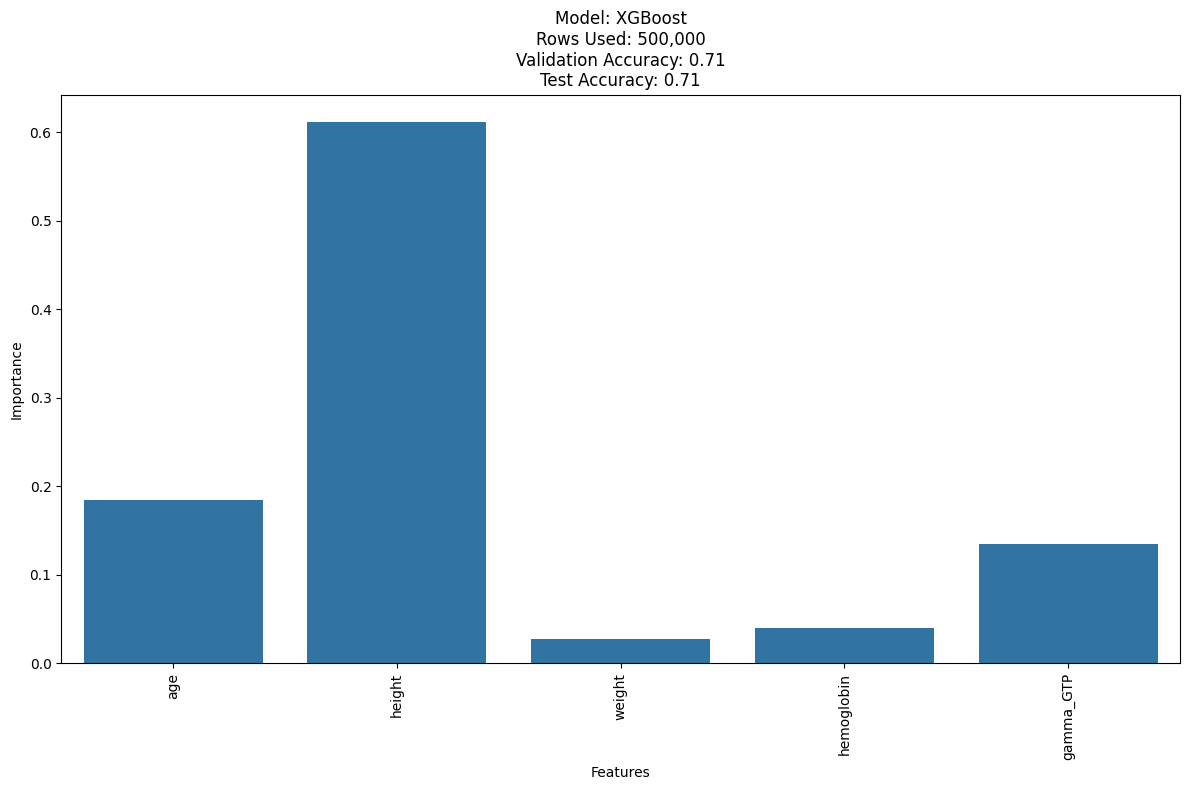

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(x=selected_features, y=final_classifier.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(f'Model: XGBoost\nRows Used: 500,000\nValidation Accuracy: {val_accuracy:.2f}\nTest Accuracy: {test_accuracy:.2f}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/machine_learning/feature_importance_plot_test.png')
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Correlation Analysis
corr_matrix = data.corr()
print(corr_matrix['DRK_YN'][['LDL_chole', 'HDL_chole']])

# Coefficient Analysis
lr.fit(X_train, y_train)
coefficients = pd.Series(lr.coef_, index=X_train.columns)
print(coefficients[['LDL_chole', 'HDL_chole']])

# Cross-Validation Scores
features_with_hdl_ldl = selected_features + ['LDL_chole', 'HDL_chole']
cross_val_scores = cross_val_score(lr, X_train[features_with_hdl_ldl], y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE with LDL and HDL:", -np.mean(cross_val_scores))

cross_val_scores_without_hdl_ldl = cross_val_score(lr, X_train[selected_features], y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE without LDL and HDL:", -np.mean(cross_val_scores_without_hdl_ldl))

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


### Exhaustive Feature Selection

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

from sklearn.ensemble import RandomForestClassifier

efs = ExhaustiveFeatureSelector(RandomForestClassifier(),
                               min_features=5,
                               max_features=5,
                               scoring='roc_auc',
                               cv=2)
efs=efs.fit(X,y)

selected_features = X_train.columns[list(efs.best_idx_)]
print(selected_features)

print(efs.best_score_)

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

# Initialize GridSearchCV with the classifier and the parameter grid
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV with the training + validation data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model using the best hyperparameters and the combined training + validation set
X_train_val_combined = pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_val_scaled)])
y_train_val_combined = pd.concat([pd.Series(y_train), pd.Series(y_val)])

best_classifier = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_classifier.fit(X_train_val_combined, y_train_val_combined)

# Predict on the test set
y_pred_test = best_classifier.predict(X_test_scaled)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test))
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Test Mean Squared Error: {mse_test}')

# Save the scaler, best model, and best hyperparameters
joblib.dump(scaler, '/content/drive/MyDrive/machine_learning/scaler_drop.pkl')
joblib.dump(best_classifier, '/content/drive/MyDrive/machine_learning/random_forest_model_drop.pkl')
joblib.dump(best_params, '/content/drive/MyDrive/machine_learning/best_params_drop.pkl')

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71      5049
           1       0.70      0.75      0.72      4951

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

Test Mean Squared Error: 0.2823


['/content/drive/MyDrive/machine_learning/best_params_drop.pkl']

In [ ]:
print("Remaining features in the dataset:")
print(X.columns)

Remaining features in the dataset:
Index(['sex', 'age', 'height', 'weight', 'waistline', 'DBP', 'BLDS',
       'triglyceride', 'hemoglobin', 'gamma_GTP'],
      dtype='object')
